<a href="https://www.kaggle.com/code/utkarshx27/economics-journal-subscription?scriptVersionId=128658415" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/economics-journal-subscription-data/Journals.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('/kaggle/input/economics-journal-subscription-data/Journals.csv')
df.head()

,Unnamed: 0,title,publisher,society,price,pages,charpp,citations,foundingyear,subs,field
0,APEL,Asian-Pacific Economic Literature,Blackwell,no,123,440,3822,21,1986,14,General
1,SAJoEH,South African Journal of Economic History,So Afr ec history assn,no,20,309,1782,22,1986,59,Economic History
2,CE,Computational Economics,Kluwer,no,443,567,2924,22,1987,17,Specialized
3,MEPiTE,MOCT-MOST Economic Policy in Transitional Econ...,Kluwer,no,276,520,3234,22,1991,2,Area Studies
4,JoSE,Journal of Socio-Economics,Elsevier,no,295,791,3024,24,1972,96,Interdisciplinary


In [4]:
df.describe()

,price,pages,charpp,citations,foundingyear,subs
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,417.722222,827.744444,3232.700000,647.055556,1966.905556,196.866667
std,385.834596,436.817402,819.358285,1182.373679,25.711484,204.528847
min,20.000000,167.000000,1782.000000,21.000000,1844.000000,2.000000
25%,134.500000,548.750000,2715.000000,97.750000,1962.750000,52.000000
50%,282.000000,693.000000,3010.000000,262.500000,1973.000000,122.500000
75%,540.750000,974.250000,3476.750000,656.000000,1982.250000,268.250000
max,2120.000000,2632.000000,6859.000000,8999.000000,1996.000000,1098.000000


In [5]:
df.isnull().sum()

Unnamed: 0      0
title           0
publisher       0
society         0
price           0
pages           0
charpp          0
citations       0
foundingyear    0
subs            0
field           0
dtype: int64

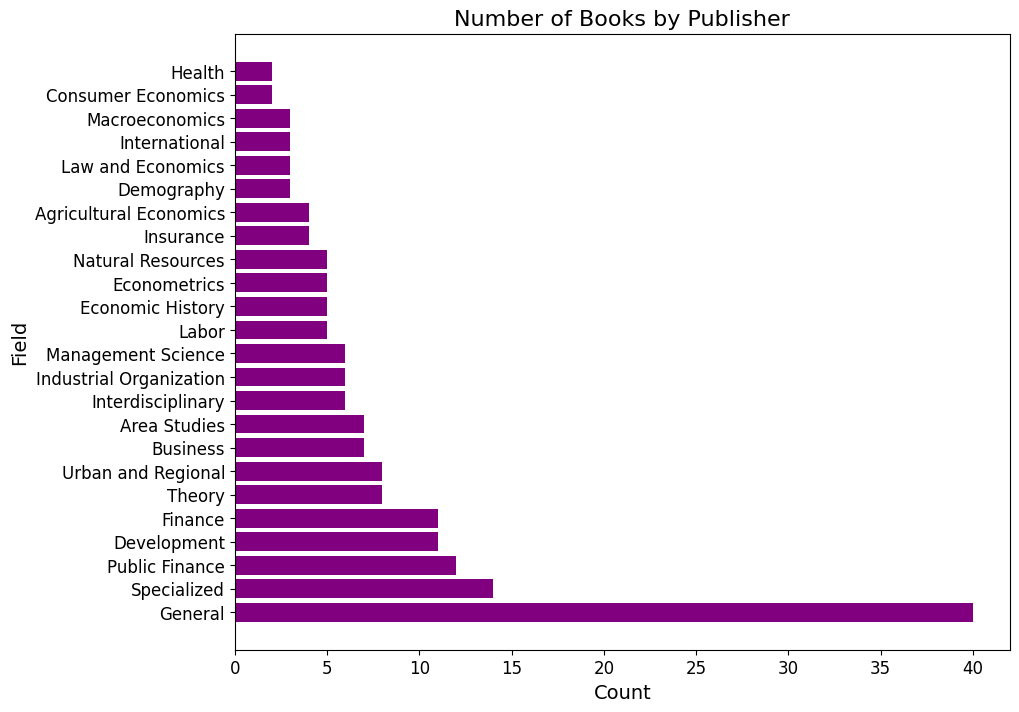

In [6]:
counts = df['field'].value_counts()
plt.figure(figsize=(10,8))
plt.barh(counts.index, counts.values, color='purple')
plt.title('Number of Books by Publisher', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Field', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [7]:
pivot_table = pd.pivot_table(df, values='foundingyear', index=['publisher'], aggfunc=np.mean)
pivot_table = pivot_table.sort_values(by=['foundingyear'], ascending=True)
pivot_table = pivot_table.rename(columns={'foundingyear': 'Avg Founding Year'})
pivot_table.index.name = 'Publisher'
print('Average Founding Year by Publisher')
print(pivot_table)


Average Founding Year by Publisher
                             Avg Founding Year
Publisher                                     
Mohr Siebeck                       1854.500000
MIT press                          1902.500000
Am. Ag. Econ Assn                  1918.000000
Ec. Society of Australia           1925.000000
Southern Econ. Assn                1932.000000
Int Assn for Res in I & W          1945.000000
Am. Finance Assn                   1945.000000
Univ of Wisconsin Press            1945.500000
National Tax Assn.                 1948.000000
Agric. Econ. Society               1948.000000
Helbing & Lichtenhahn              1948.000000
Univ of Chicago Press              1952.714286
Blackwell                          1953.538462
Am Ec Assn                         1953.666667
Inst for OR and MS                 1954.000000
MIT                                1960.000000
Inst of Devel Econ                 1963.000000
Carfax                             1963.666667
Pop Assn America         

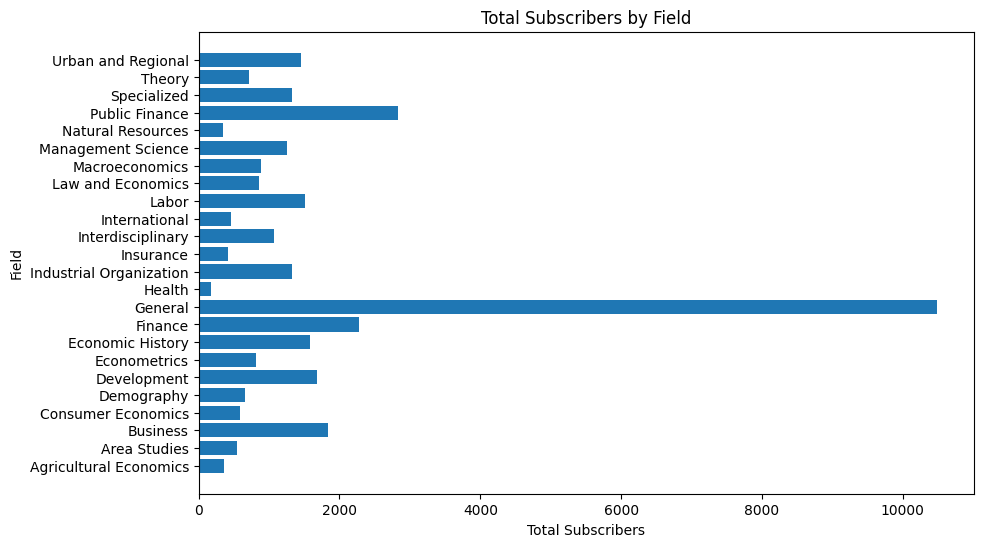

In [8]:
df = pd.read_csv('/kaggle/input/economics-journal-subscription-data/Journals.csv')
df_agg = df.groupby('field')['subs'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(df_agg['field'], df_agg['subs'])
ax.set_xlabel('Total Subscribers')
ax.set_ylabel('Field')
ax.set_title('Total Subscribers by Field')
plt.show()


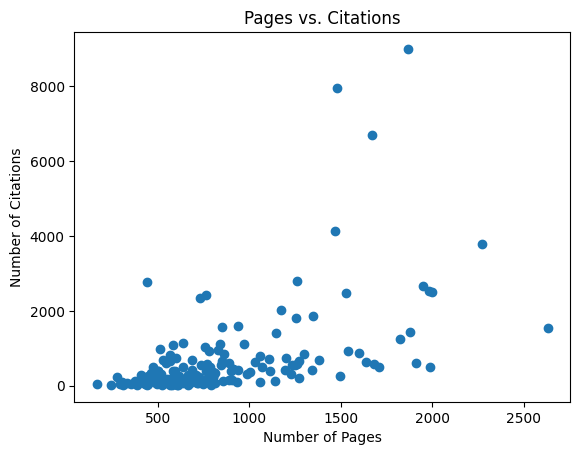

In [9]:
plt.scatter(df['pages'], df['citations'])
plt.xlabel('Number of Pages')
plt.ylabel('Number of Citations')
plt.title('Pages vs. Citations')
plt.show()

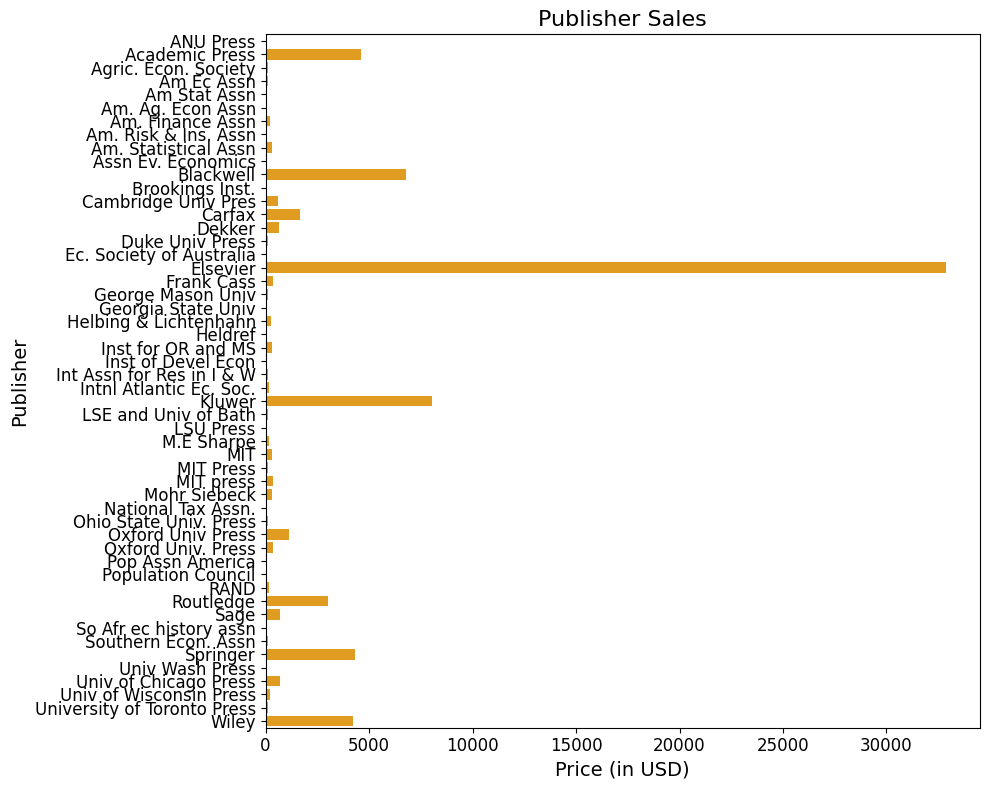

In [10]:
cou = df.groupby('publisher')['price'].sum()
plt.figure(figsize=(10,8))
sns.barplot(x=cou.values, y=cou.index, color='orange')
plt.title('Publisher Sales', fontsize=16)
plt.xlabel('Price (in USD)', fontsize=14)
plt.ylabel('Publisher', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


/tmp/ipykernel_20/2687955096.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sizes = df.groupby('field').sum()['subs']


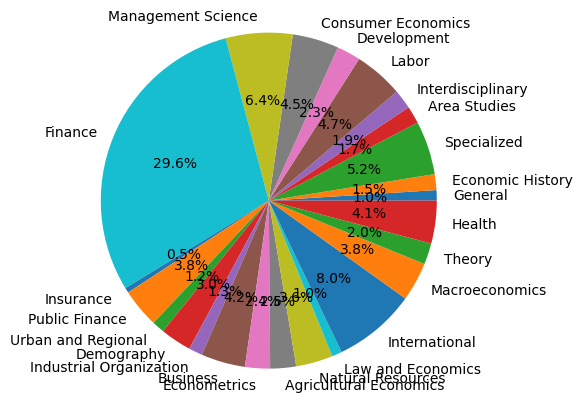

In [11]:
# another way to visulize subs vs field
labels = df['field'].unique()
sizes = df.groupby('field').sum()['subs']
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()